**-----------------------------------------------------------------------------------------------------------------**

*In this lecture we are going to explore:*

1. How do Pre-trained Transformers Work in NLP?
2. Python implementation of Pre-trained Transformers.

**-----------------------------------------------------------------------------------------------------------------**

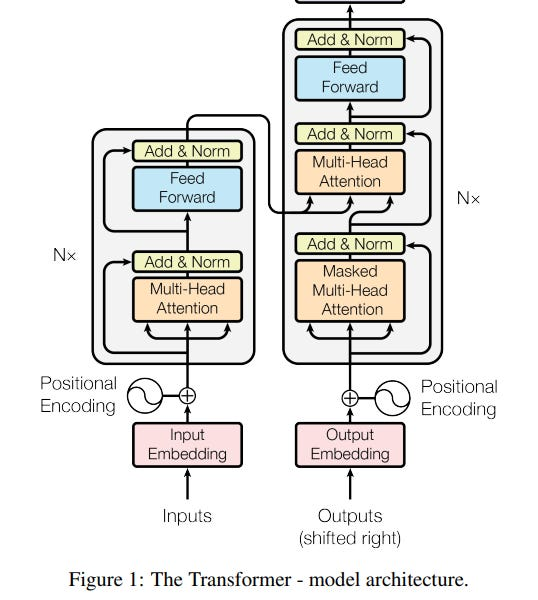

# 4.3 Pre-trained Transformer Models

##### The transformer architecture, introduced in the paper “Attention is All You Need” by Vaswani et al. (2017), has become the foundation for many pre-trained models. It’s based on a mechanism called “self-attention” or “scaled dot-product attention.”

* Transformer models work by first encoding the input sentence into a sequence of vectors. This encoding is done using a self-attention mechanism, which allows the model to learn the relationships between the words in the sentence.
  
* Once the input sentence has been encoded, the model decodes it into a sequence of output tokens. This decoding is also done using a self-attention mechanism.

* The attention mechanism is what allows transformer models to learn long-range dependencies between words in a sentence. The attention mechanism works by focusing on the most relevant words in the input sentence when decoding the output tokens.

* Pre-trained transformer models leverage the idea of transfer learning. Instead of training a model from scratch for a specific task, these models are pre-trained on massive amounts of diverse data for a general language understanding task.

* Fine-Tuning: Once pre-trained, these models can be fine-tuned on smaller datasets for specific tasks like sentiment analysis, named entity recognition, question answering, translation, etc.

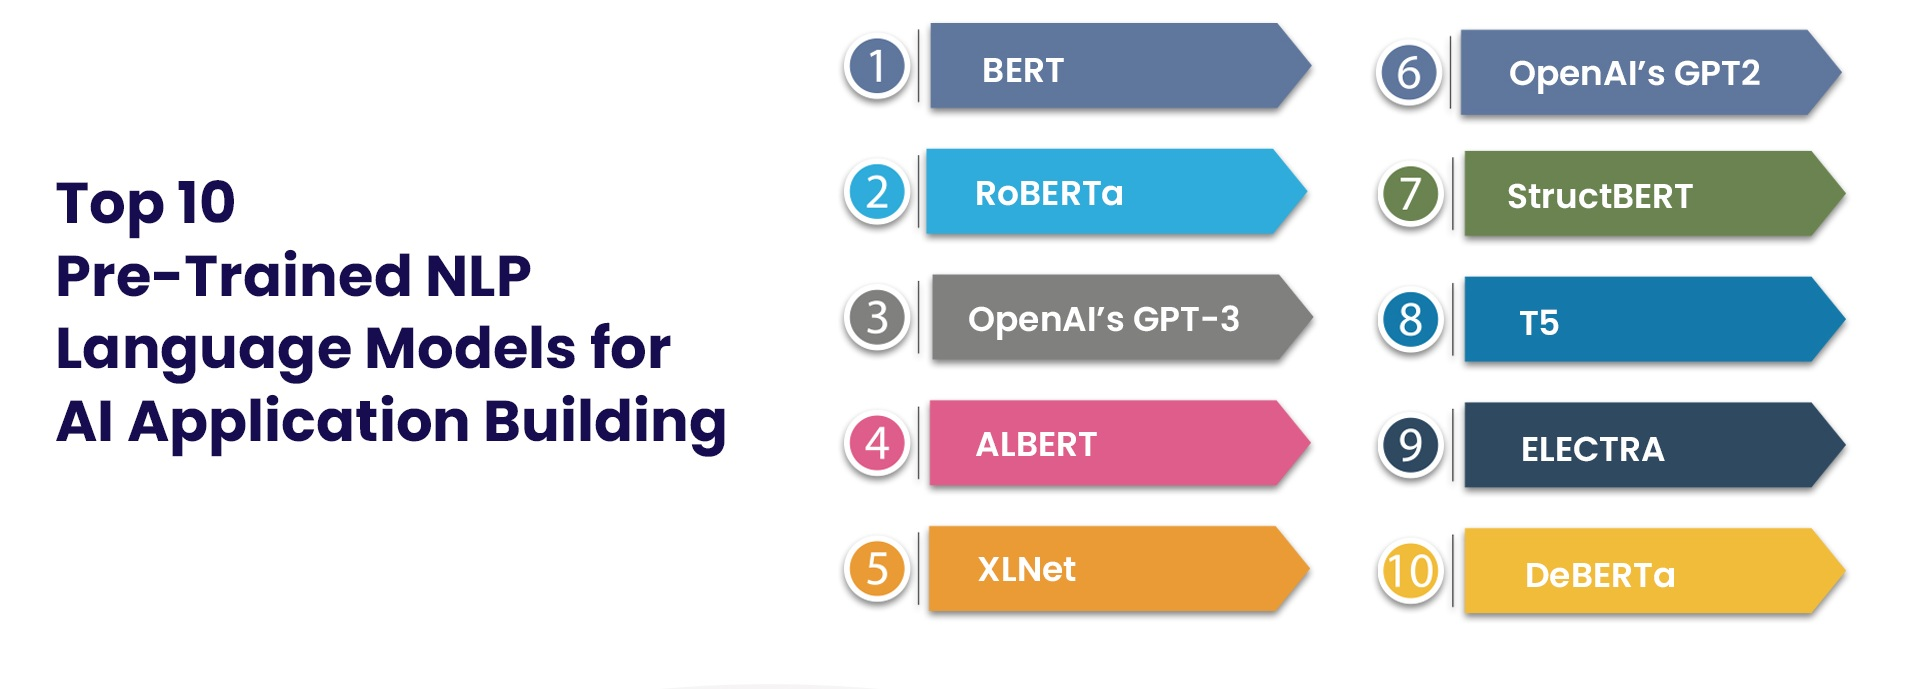

#### Popular Pre-trained Models:

1. BERT (Bidirectional Encoder Representations from Transformers)

2. GPT (Generative Pre-trained Transformer)

3. T5 (Text-to-Text Transfer Transformer)

4. XLNet

https://arxiv.org/pdf/1706.03762

In [1]:
import transformers
from transformers import pipeline

In [2]:
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [3]:
sentence_1 = "i had a great time at the movie it was really funny"
sentence_2 = "i had a great time at the movie but the parking was terrible"
sentence_3 = "i had a great time at the movie but the parking wasn't great"
sentence_4 = "i went to see a movie"

In [4]:
print(sentence_1)
sentiment_pipeline(sentence_1)

i had a great time at the movie it was really funny


[{'label': 'POSITIVE', 'score': 0.9998176693916321}]

In [5]:
test = sentiment_pipeline(sentence_1)
[sub['label'] for sub in test]

['POSITIVE']

In [6]:
print(sentence_2)
sentiment_pipeline(sentence_2)

i had a great time at the movie but the parking was terrible


[{'label': 'NEGATIVE', 'score': 0.9977464079856873}]

In [7]:
print(sentence_3)
sentiment_pipeline(sentence_3)

i had a great time at the movie but the parking wasn't great


[{'label': 'NEGATIVE', 'score': 0.9984902143478394}]

In [8]:
print(sentence_4)
sentiment_pipeline(sentence_4)

i went to see a movie


[{'label': 'POSITIVE', 'score': 0.9802700281143188}]

The default model isn't giving us great results for our neutral sentence. However there are loads of models we can choose to use that have been trained on different data with different parameters: https://huggingface.co/models?pipeline_tag=text-classification&sort=downloads&search=sentiment

Let's try a specific model trained on tweets in the English language only and see if that improves our results.

In [9]:
specific_model = pipeline("sentiment-analysis", model="finiteautomata/bertweet-base-sentiment-analysis")

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use cpu


In [10]:
print(sentence_1)
specific_model(sentence_1)

i had a great time at the movie it was really funny


[{'label': 'POS', 'score': 0.9923344254493713}]

In [11]:
print(sentence_2)
specific_model(sentence_2)

i had a great time at the movie but the parking was terrible


[{'label': 'NEG', 'score': 0.5355526208877563}]

In [12]:
print(sentence_3)
specific_model(sentence_3)

i had a great time at the movie but the parking wasn't great


[{'label': 'POS', 'score': 0.6234413981437683}]

In [13]:
print(sentence_4)
specific_model(sentence_4)

i went to see a movie


[{'label': 'NEU', 'score': 0.9007406234741211}]